<a href="https://colab.research.google.com/github/patriciaanggraeni/PCVK_Ganjil_2023/blob/main/week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengayaan Materi KTP

## 1. mengimport library

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os

from google.colab.patches import cv2_imshow
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## 2. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut


In [22]:
# lokasi hasil pelat
path = "/content/drive/MyDrive/PCVK/Images/KTP/dataset/"

# Melakukan looping file di direktori
for name_file in sorted(os.listdir(path)):
  src = cv.imread(os.path.join(path, name_file))
  blurred = src.copy()
  gray = blurred.copy()

## 3. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [23]:
# Melakukan filtering
for i in range(10):
  blurred = cv.GaussianBlur(src, (5, 5), 0.5)

## 4. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [24]:
# Ubah gambar ke mode grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print(ret, bw.shape)

168.0 (300, 493)


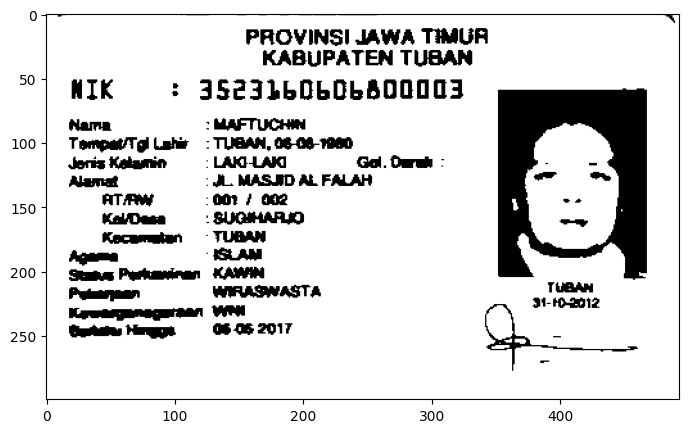

In [29]:
def display(image, cmap='gray'):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(111)
  ax.imshow(image, cmap)

display(bw)

## 5. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

In [35]:
def dilasi_citra(F, w):
  height, width = F.shape

  image_copy = np.zeros((height, width), dtype=np.uint8)

  # generate structure element
  structure_element = np.ones((w,w), dtype=np.uint8)
  constant = (w - 1) // 2

  # melakukan proses dilasi
  for i in range(constant, height - constant):
    for j in range(constant, width - constant):
      temp = F[i-constant:i+constant+1,j-constant:j+constant+1]
      product = temp * structure_element
      image_copy[i,j]= np.max(product)

  return image_copy

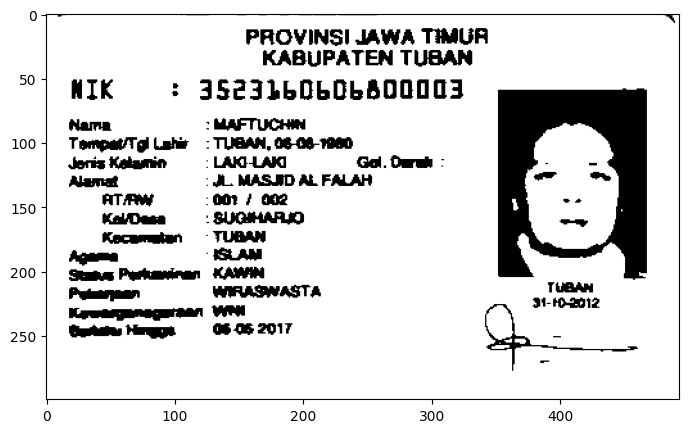

In [39]:
image_morphology = dilasi_citra(bw, 1)
display(image_morphology)

In [56]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP/dataset/ktp3.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP/dataset/template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv.imwrite('/content/drive/MyDrive/PCVK/Images/KTP/dataset/result.png', img_rgb)

True

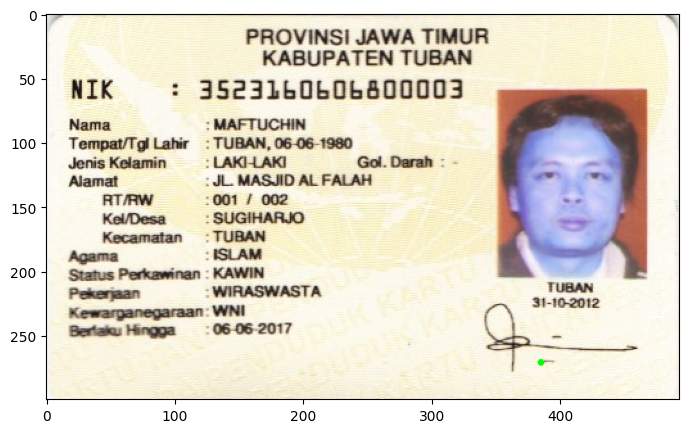

In [91]:
image = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP/dataset/ktp3.png")
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, threshold = cv.threshold(img_gray, 125, 255, 0)
contours, hr = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, 1, (0, 255, 0), 2)

display(image)

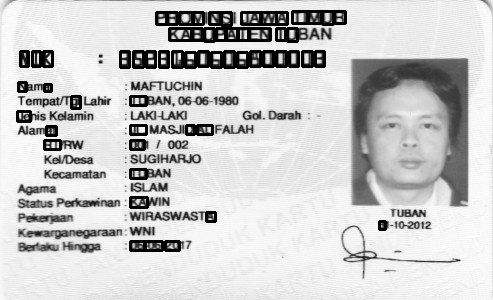

In [146]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP/dataset/ktp3.png', 0)
_, binary_image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_contour_area = 20
max_contour_area = 2000
min_aspect_ratio = 0.4
max_aspect_ratio = 2.0

selected_contours = []
for contour in contours:
    area = cv.contourArea(contour)
    if min_contour_area < area < max_contour_area:
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = float(w) / h
        if min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            selected_contours.append(contour)
            cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)

## Anggota Kelompok

1. Bahtiar Rifa'i
2. Arya Wicaksana Hidayat
3. Patria Anggara Susilo Putra
4. Salma Annissa Azizi
5. Shofiatul Ayu Anikaningrum

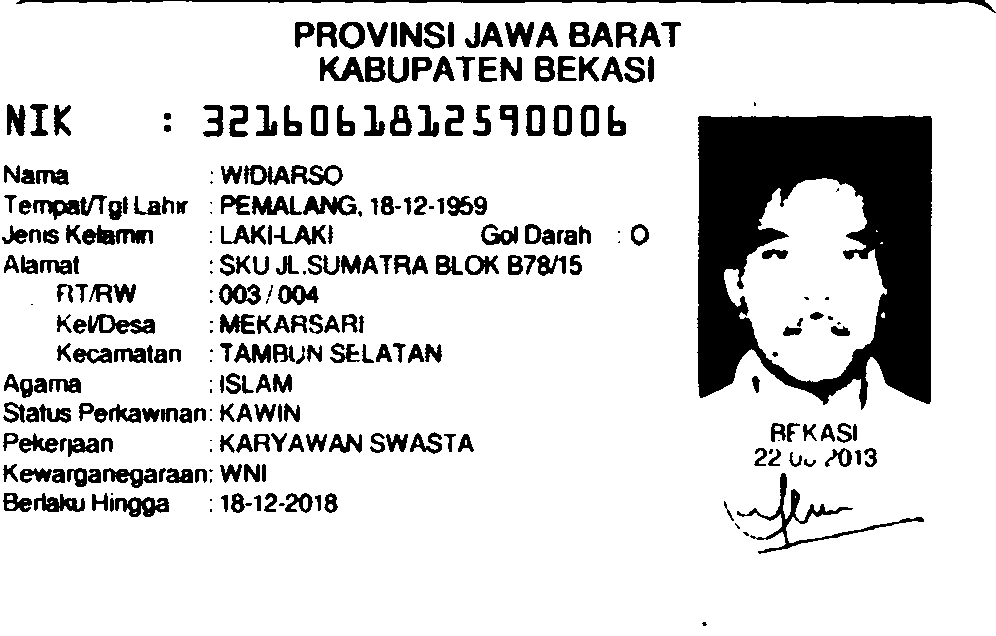

In [152]:
image = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP/ktp6.png")

blurred_image = cv.GaussianBlur(image, (5, 5), 0)
gray_image = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)
ret, thresholded_image = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

cv2_imshow(thresholded_image)

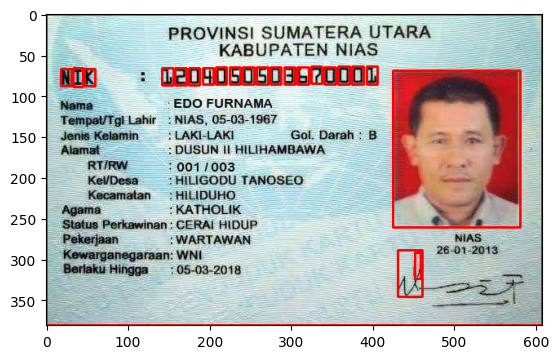

In [133]:
image = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP/ktp5.png")

blurred = cv.GaussianBlur(image, (5, 5), 0.5)
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

ktp_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()